# Eigenfaces y Face Recognition

## Proyecto Final Optimización

Esforzado Profesor: 

 - Erick Palacios 
 
Esforzados Estudiantes:

 - Elena Villalobos Nolasco
 - Nancy Dira Martínez Guzmán
 - Laura Marcela Tejada López
 - Santiago Battezati

El trabajo busca implementar el algoritmo de Eigenfaces como uno de los modos de enfrentarse al problema de reconocimiento de rostro. Para ello, el presente reporte ha quedado estructurado de la siguiente manera:

 - 1. Introducción: Un poco de historia del reconocimiento de rostro 

 - 2. PCA: Principal Component Analysis 

 - 3. Eigenfaces: Descripción del problema e Implementación del algoritmo 
 
      - 3.1. Descripción de la base de datos
      - 3.2. Algoritmo de Eigenfaces: Descripción
      -  3.3. Eigenfaces: implementación
      

 - 4. Eigenfaces - Jacobi: Implementación del algoritmo en base a la descomposición de Jacobi One Sided

 - 5. Conclusiones: Aplicaciones del algoritmo de Eigenfaces, limitaciones y variantes alternativas
 
 - 6. Referencias

## 1. Introducción: Un poco de historia del reconocimiento de rostro

El problema del reconocimiento de caras ha sido una cuestión sumamente estudiada. El mismo, puede ser entendido como un problema de clasificación. Dada una base de datos con varias imágenes de distintas personas (más de una imagen por persona), determinar si una nueva imagen corresponde a una de las personas de la base de datos o si no se encuentra en la base de datos.  
 

El primer caso exitoso de reconocimiento de rostro fue hecho por Turk y Pentaland en 1991, y es conocido como Eigenfaces. El algoritmo es entrenado a partir de una base de datos con varias imágenes de rostros de distintas personas. Cada imagen es representada por un vector de pesos y estos pesos son obtenidos proyectando la imagen en componentes eigenface. La imagen a ser clasificada es representada por un vector de pesos y comparada con la base de datos. Este es el algoritmo que analizaremos a lo largo de este trabajo. 

A lo largo de los años, pueden identificarse dos tendencias principales en los algoritmos desarrollados para reconocer rostros (y una tercera tendencia que puede entenderse como un híbrido de las dos anteriores).     
Estas tendencias pueden resumirse como: 
-Algoritmos basados en la apariencia (holísticos):se basan en la totalidad del rostro a ser reconocido.  
-Algoritmos basados en rasgos (features): esta técnica se basa en rasgos faciales como la boca, los ojos y las mejillas, así como la relación geométrica entre estos rasgos.  


Los algoritmos de clasificación más utilizados para resolver el problema del reconocimiento de rostro han sido  PCA (principal component analysis) y LDA (Linear Discriminant Analysis). Eigenfaces y Fisherfaces (otro algoritmo al que nos referirmos en las conclusiones) serían ejemplos de estos, respectivamente (aunque Fisherfaces también utiliza PCA). También se han utilizado métodos bayesianos, entre otros. A continuación, desarromos brevemente PCA, antes de adentrarnos en Eigenfaces.

## 2. PCA: Análisis de componentes principales

 El **Análisis de Componentes Principales** (PCA) se utiliza usualmente como una técnica de visualización, reducción de dimensión y también como un paso intermedio en el análisis de datos como técnica explicatoria. Es por ello que este método es uno de los usos principales de la SVD (descomposición en valores singulares).

 La idea de PCA es que dado algún vector $x = (X_1, \dots, X_p)$, buscamos un conjunto de combinaciones lineales $Y_i = a^{T}_ix$, $i = 1,2, \dots, p$, de forma tal que la variabilidad de $k$, con $k < p$, de estos sea aproximadamente la variabilidad correspondiente a todo el vector.
 
  Geométricamente, esta transformación representa la selección de un nuevo conjunto de coordenadas, que obtenemos mediante rotación y traslación del sistema original a ejes, en donde se maximiza la varianza en cada dirección. Este nuevo sistema de coordenadas está determinado por las componentes principales (CPs), que son no correlacionadas (ortogonales) entre sí. Luego, las primeras $k$ componentes principales expanden un subespacio que contiene a *la mejor visualización* en $k$ dimensiones; es decir, una proyección vista en la dirección de más información. En este sentido, las coordenadas ortogonales que conforman el nuevo subespacio, aunque son no correlacionadas entre sí, tienen la máxima correlación con las observaciones (vector renglón).
  
 La transformación de componentes principales está dada por: $$y = P^{T}(x - \mu)$$
  
  
donde 
- $P = [e_1 | \dots | e_p]$ es la matriz de eigenvectores de $\varSigma$, la matriz de covarianzas, tal que $\varSigma = P \varLambda P^{T}$.
- $x$ vector renglón.
- $\mu$ el vector de medias.

### El problema de optimización

El problema de optimización en PCA consiste en resolver el siguiente sistema:

$$\displaystyle \max_{a_1^{T} a_1 = 1} a_1^{T} \varSigma a_1 = Var(Y_1)$$

$$\text{sujeto a:}$$

$$a_1^{T} a_1 = 1$$

$$\displaystyle \max a_i^{T} \varSigma a_i = Var(Y_i), i = 2, \dots, n$$

$$\text{sujeto a:}$$

$$a_i^{T} a_i = 1$$

$$a_i^T \varSigma a_k = 0, k<i$$


donde:
- $x$ es un vector de tamaño $p \times 1$ con matriz de covarianzas $\varSigma$ y eigenvalores $\lambda_1 \geq \lambda_2 \geq \dots \lambda_p \geq 0$.
- $a_1, \dots, a_p \in \mathbb{R}^p$ los coeficientes de las $p$ combinaciones lineales $Y_i = a_ix$
- La norma $||a_i||=1$, para no incrementar de forma arbitraria $Var(Y_i)$, ya que esta varianza se podría incrementar arbitrariamente al multiplicar $a_i$ por alguna constante.
- $a_i^T \varSigma a_k = 0, k<i$ es equivalente a decir que $Cov(a_i^T X, a_k^T X) = 0, k<i$ (ya que buscamos que las componentes principales sean ortogonales).


 De modo que la primera componente principal es la combinación lineal con varianza máxima; es decir, que maximiza $Var(Y_1) = a_1^{T} \varSigma a_1$

 La solución a este problema de optimización es: $$a_i^* = e_i, Var(Y_i) = \lambda_i$$
 
 Los vectores y valores propios de $\varSigma$.
 
 Por lo que la $i$-ésima componente principal está dada por:
 
 $$\hat{y_i} = \hat{e_i}^Tx = \hat{e_{i1}}x_1 + \hat{e_{i2}}x_2 + \dots + \hat{e_{ip}}x_p$$
 
 donde $\hat{e_i}$ es el eigenvector asociado al $i$-ésimo eigenvalor $\hat{\lambda_i}$, con $\hat{\lambda_1} \geq \hat{\lambda_2} \geq \dots \geq \hat{\lambda_p} \geq 0$.

#### Observación:

 Notemos que $tr(\varSigma) = \sum_{i=1}^{p} \lambda_i = \sum_{i=1}^{p} Var(Y_i)$, por lo que la proporción de la varianza total explicada  de la i-ésima componente principal es:
 
 $$\frac{\lambda_i}{\lambda_1 + \lambda_2 + \dots + \lambda_p}, i = 1, \dots, p$$
 
 Luego, si la mayor parte de la varianza total se puede atribuir a las primeras componentes, entonces con éstas componentes podemos *sustituir* a las $p$ variables, sin perder mucha información, a cambio de disminuir la dimensión de nuestro problema.

### Pasos

1. Estandarización de variables
2. Selección del número de componentes principales según el porcentaje de varianza explicada
3. Utilizar el algoritmo de PCA, que podemos consultar en la documentación de [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
4. Interpretar las componentes principales

### Elección de las Componentes Principales

 No existe una regla definitiva para determinar el número de componentes principales con las que resolveremos cada problema particular, pero en general, podemos utilizar las siguientes guías:

- Quedarnos con las CP que acumulen cierto porcentaje de la variación total.
- Quedarnos con las CP cuyos eigenvalores sean mayores que el promedio $\bar{\lambda}$.
- Utilizar una gráfica de codo (*scree plot*).
- Verificar la significancia de las componentes más *grandes*.

### Interpretación de las Componentes Principales

 La interpretación de las **componentes principales** depende de cada problema particular, así como de la varianza explicada en cada una de las componentes. En este sentido, debemos de analizar para nuestro problema, para cada componente principal, con cuáles variables originales está fuertemente correlacionada, y si se incrementa o decrementa ante cambios en estas variables, puesto que la componente principal podemos interpretarla como un *resumen* de las variables originales con las que guarda una correlación (positiva o negativa) alta.

## Ventajas y Desventajas de PCA

**Ventajas**:
- Reducción de variables correlacionadas entre sí.
- Mejora el desempeño del algoritmo, al trabajar con menos variables el tiempo de entrenamiento puede ser significativamente menor.
- Reduce el sobreajuste.
- Puede proveer una mejor visualización.


**Desventajas**:
- Las componentes principales pueden ser sensibles a outliers.
- Las componentes principales son sensibles a distintos escalamientos de los datos originales (obtendemos distintas CP según las transformaciones que hagamos a los datos), puesto que el porcentaje de varianza explicado será distinto. Además, es necesario hacer una estandarización de las variables originales.
- Difícil interpretación de las componentes principales y de las visualizaciones.
- Puede haber una pérdida significativa de información si las componentes principales no son seleccionadas con cuidado.

##  3. Eigenfaces: Descripción del problema e Implementación del algoritmo 

### 3.1. Descripción de la base de datos

La base de datos seleccionada para este proyecto fue la base [The Extended Yale Face Dataset B](http://vision.ucsd.edu/~iskwak/ExtYaleDatabase/ExtYaleB.html) , en específico las versión recortada utilizada en el artículo [Acquiring Linear Subspaces for Face Recognition under Variable Lighting](http://vision.ucsd.edu/~leekc/papers/9pltsIEEE.pdf). Estas versiones recortadas resultan mejores para este tipo de algoritmos pues dentro de la foto sólo aparece la región entre las orejas y de la frente a la barbilla, así evitamos generar ruido innecesario producido por el cabello, ropa o joyería utilizada por la persona a la que se le toma la foto.
 
La manera en que se recolectaron las fotos de este dataset fue con la ayuda de un domo geodésico que tenía varias lámparas alrededor programadas para activarse en distintos momentos en un intervalo de 2 segundos para generar 64 distintas configuraciones de iluminación. En el centro de este domo se sentaba a la persona que se iba a fotografiar y al activarse la secuencia de iluminación se tomaron 64 fotografías de cada persona. Este procedimiento se repitió para 38 personas.

Cada fotografía en su versión recortada tiene dimensiones de 168 x 192 pixeles lo que, una vez vectorizada la imagen, resulta en un vector con 32,256 entradas. Multiplicando esto por las 64 fotos de las 38 personas, obtenemos una matriz con aproximadamente 78 millones de entradas.

### 3.2. Algoritmo de Eigenfaces: Descripción

El problema de las eigenfaces es un problema relativamente viejo, tuvo sus inicios en 1987 con Sirovich y Kirby en su artículo [Low-dimensional procedure for the characterization of human faces](http://pdfs.semanticscholar.org/2a62/d0cca2fabf1d6f6ee15e4c14cef415b657d1.pdf) pero no fue si no hasta 1991 que se estudió su aplicación en reconocimiento facial automatizado con Turk y Pentland en su artículo [Eigenfaces for Recognition](https://www.mitpressjournals.org/doi/pdf/10.1162/jocn.1991.3.1.71).

En este caso, nuestro conjunto de datos tiene 38 personas, tomamos 36 de estas para nuestro conjunto de entrenamiento y resguardamos las 2 restantes para el conjunto de prueba.

Antes de comenzar a trabajar, y como se mencionó en la sección anterior, es necesario pasar cada una de las imágenes a un vector columna y colocar cada uno de estos en una matriz. Posteriormente, obtenemos el vector columna promedio de esta matriz y se lo restamos a todos los vectores para así centrar nuestros datos.

![title](../images/matriz-x.png)

Así, el calcular la SVD de la matriz de fotos centrada se es realmente un problema de cálculo de PCA. Una vez calculada la SVD y tomando en cuenta la notación usual, la matriz U representa un **ESPACIO?** donde cada uno de sus vectores columna son vectores que conforman una base ortonormal de este espacio , también conocidos como eigenfaces.

![title](../images/matriz-u.png)

### 3.3. Eigenfaces: implementación

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io

In [3]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

Leemos el contenido de la matriz de rostros:

In [4]:
mat_contents = scipy.io.loadmat(os.path.join('allFaces.mat'))

In [5]:
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

donde:

m, n es el ancho y el alto de cada foto en pixeles

In [6]:
print(m, n)

168 192


nfaces es el número de fotos que se tomaron de cada persona

In [7]:
print(nfaces)

[64 62 64 64 62 64 64 64 64 64 60 59 60 63 62 63 63 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64]


faces es la matriz que contiene todas las fotos de todas las personas en la base de datos. donde cada renglón es una foto vectorizada

In [8]:
faces.shape

(32256, 2410)

Grafiquemos la primer foto de cada una de las personas:

In [9]:
allPersons = np.zeros((n*6,m*6))
count = 0

In [10]:
#grafica la primera foto de cada una de las personas
for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1

In [11]:
# la matriz allPersons es una matriz de 1152 x 1008
# donde 1152 = 6 * 192 y 1008 = 6 * 168
# ya que la matriz es de 6 imágenes por 6 imágenes
# cda entrada de la matriz describe un pixel de la imagen total

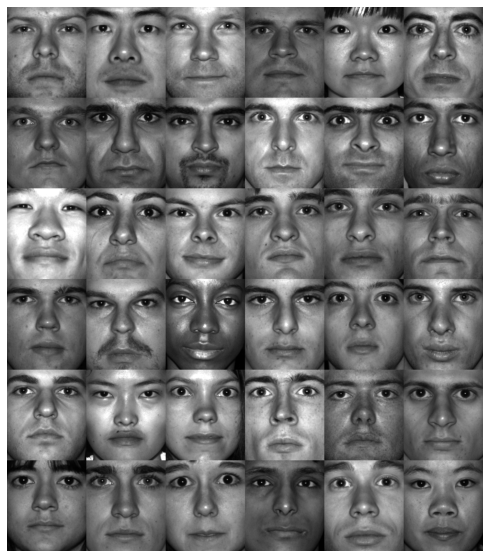

In [12]:
img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')
plt.show()

Ahora grafiquemos dos ejemplos de personas con diferentes sombras.

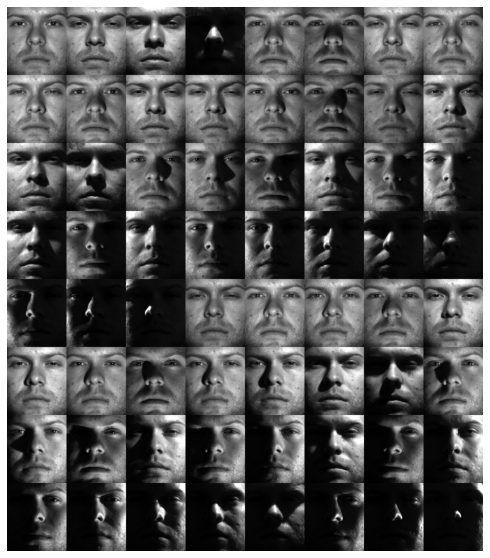

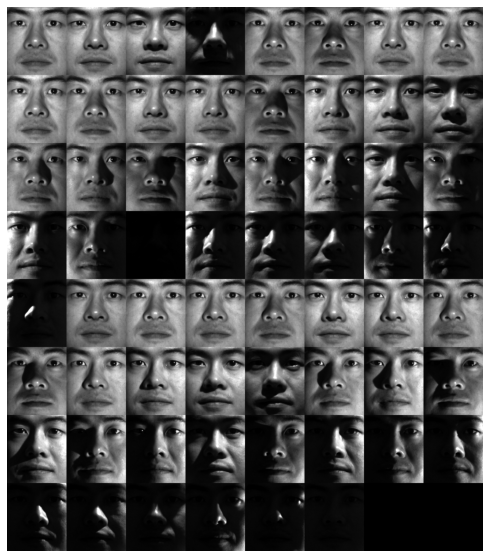

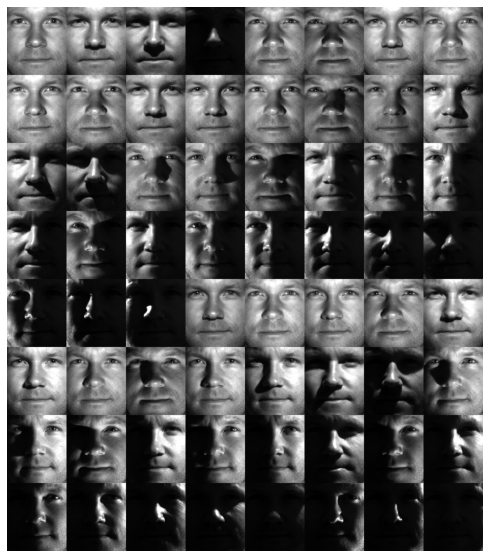

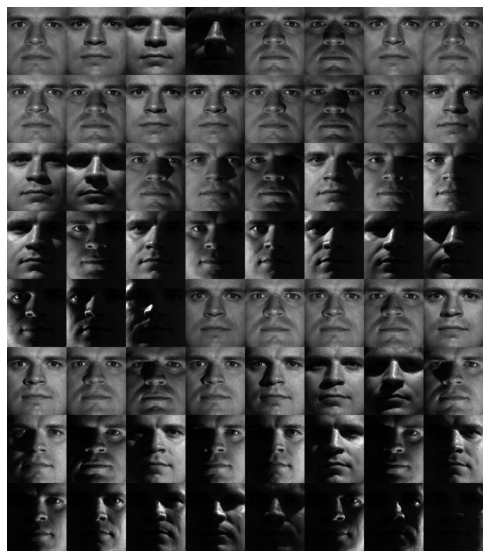

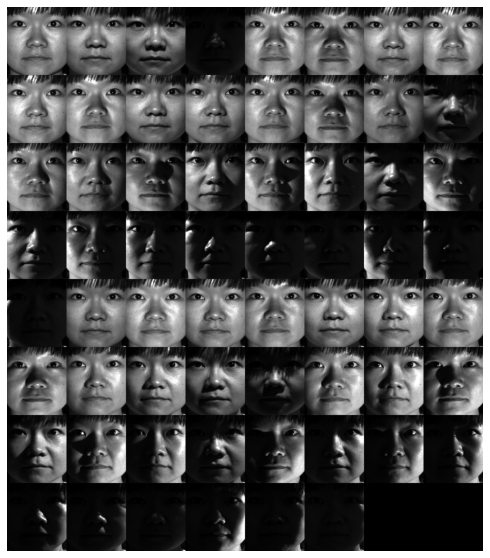

In [49]:
for person in range(5):
    subset = faces[:,sum(nfaces[:person]) : sum(nfaces[:(person+1)])]
    allFaces = np.zeros((n*8,m*8))
    
    count = 0
    
    for j in range(8):
        for k in range(8):
            if count < nfaces[person]:
                allFaces[j*n:(j+1)*n,k*m:(k+1)*m] = np.reshape(subset[:,count],(m,n)).T
                count += 1
    img = plt.imshow(allFaces)
    img.set_cmap('gray')
    plt.axis('off')
    plt.show()

Ahora, separamos un conjunto de 36 caras para "entrenar" nuestro algoritmo:

In [15]:
training_faces = faces[:, :np.sum(nfaces[:36])]

In [16]:
training_faces.shape

(32256, 2282)

Calculamos el promedio sobre todas las fotos de estas 36 caras para obtener la cara promedio

In [15]:
avg_face = np.mean(training_faces, axis=1)

La cara promedio:

(-0.5, 167.5, 191.5, -0.5)

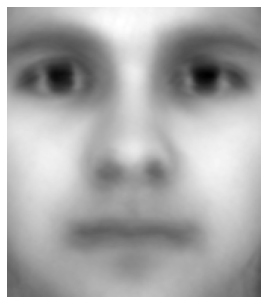

In [16]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avg_face,(m,n)).T)
img_avg.set_cmap('gray')
plt.axis('off')

Le restamos este promedio a todos los vectores (columnas?) de la matriz para centrar los datos

In [17]:
X = training_faces - np.tile(avg_face,(training_faces.shape[1], 1)).T
#aquí creo no entendí bien, por que saca el promedio por renglon pero luego se lo resta a las columnas :S perdón, amigos

Obtenemos la descomposición en valores singulares con linalg de numpy

In [18]:
U, S, VT = np.linalg.svd(X, full_matrices=0)

En la matrix U tenemos una base ortonormal para representar a las caras, los vectores de esta base se conocen como eigenfaces

Por ejemplo, veamos la primera *eigenface*:

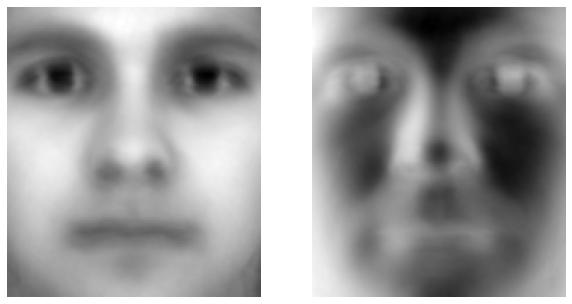

In [19]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avg_face,(m,n)).T)
img_avg.set_cmap('gray')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:,0],(m,n)).T)
img_u1.set_cmap('gray')
plt.axis('off')

#aquí no entiendo bien lo de subplot

plt.show()

### Reconstrucción de una cara test
Las caras 37 y 38 no fueron utilizadas para "entrenar" el algoritmo. Veamos que podemos reconstruir estas caras nuevas con un subconjunto de nuestras eigenfaces.

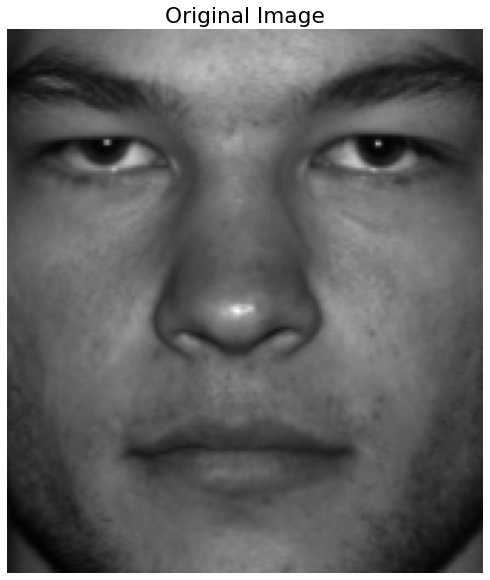

In [20]:
test_face = faces[:,np.sum(nfaces[:36])] # Primera foto de la persona 37
plt.imshow(np.reshape(test_face,(m,n)).T)
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

La razón por la que podemos hacer una aproximación a cada cara con un subconjunto de eigenfaces es por que podemos aproximar X como:
$$ \hat{X} \approx U_r \Sigma_r V_r^T$$
Entonces podemos poner
$$ \alpha = U_r^T x$$
como el vector que contiene la información de que tanto se necesita de cada eigenface para reconstruir a x (i.e. combinación lineal de eigenfaces). Es este espacio cada $\alpha$ es única para cada cara. Entonces una aproximación de $x$ tomando únicamente $r$ eigenfaces sería:
$$\hat{x} = U_r U_r^T x$$

Esta es una compresión muy grande pues para guardar una foto en vex de utilizar los 168 x 192 pixeles únicamente necesitariamos un vector de tamaño $r$ para representar todas las caras del mundo.

In [21]:
test_face_MS = test_face - avg_face #MS = Mean - Substracted
r_list = [25, 50, 100, 200, 400, 800, 1600]

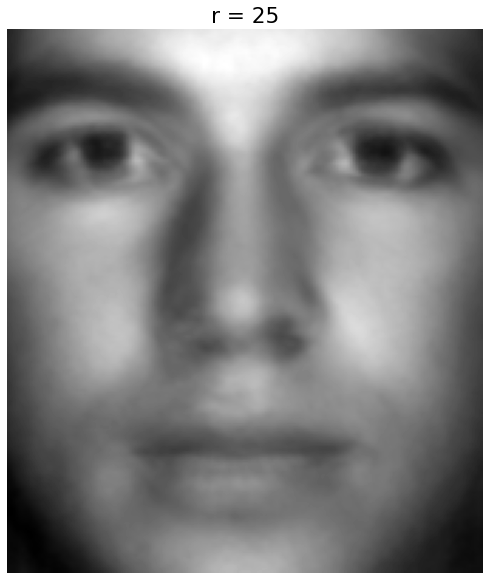

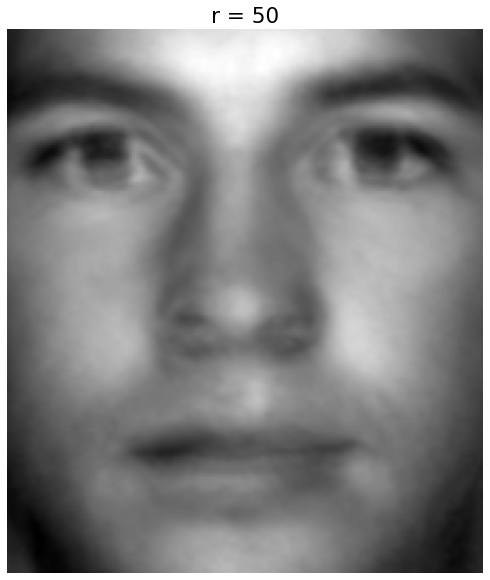

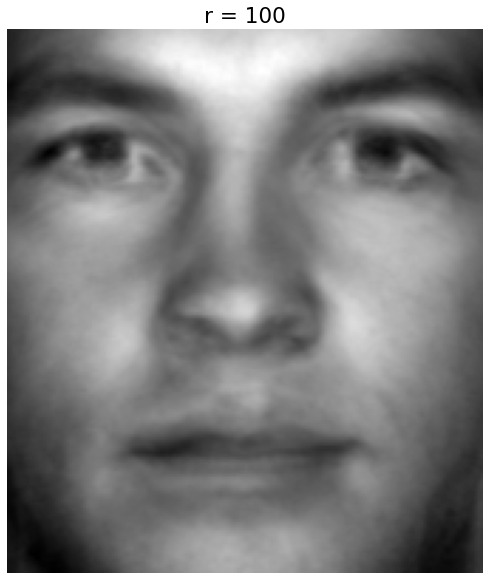

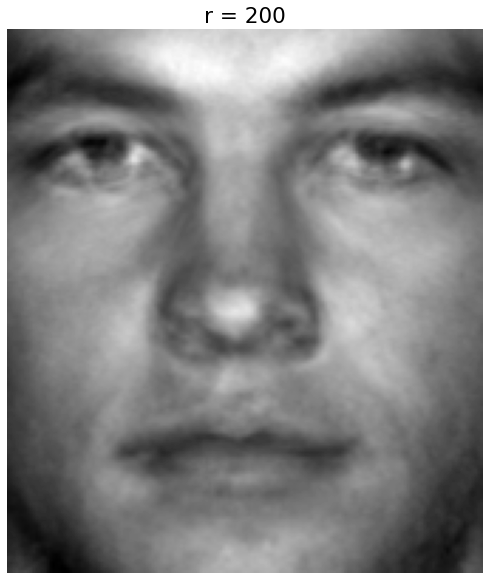

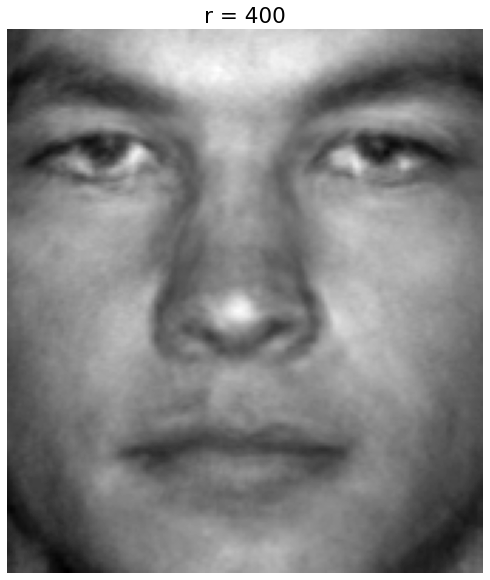

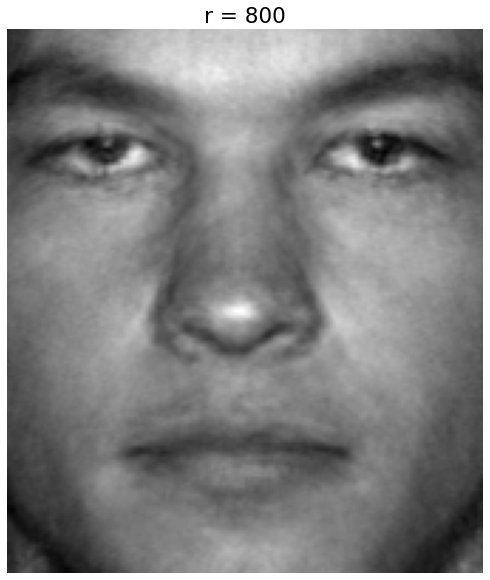

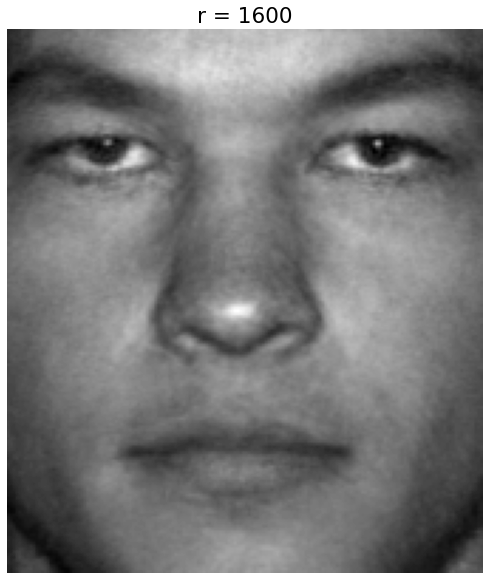

In [22]:
for r in r_list:
    recon_face = avg_face + U[:,:r]  @ U[:,:r].T @ test_face_MS
    img = plt.imshow(np.reshape(recon_face,(m,n)).T)
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')
    plt.show()

Y notamos que obtenemos una muy buena aproximación usando sólo 1600 vectores de U.

## Proyectar a las personas 1 y 7 en PC5 y PC6

In [23]:
P1_num = 2 # Persona 2
P2_num = 7 # Persona 7

In [24]:
P1 = faces[:, np.sum(nfaces[:(P1_num - 1)]):np.sum(nfaces[:P1_num])]
P2 = faces[:, np.sum(nfaces[:(P2_num - 1)]):np.sum(nfaces[:P2_num])]

In [25]:
P1 = P1 - np.tile(avg_face,(P1.shape[1], 1)).T
P2 = P2 - np.tile(avg_face,(P2.shape[1], 1)).T

In [26]:
pca_modes = [5, 6] # Project onto PCA modes 5 and 6
pca_coordsP1 = U[:, pca_modes - np.ones_like(pca_modes)].T @ P1
pca_coordsP2 = U[:, pca_modes - np.ones_like(pca_modes)].T @ P2

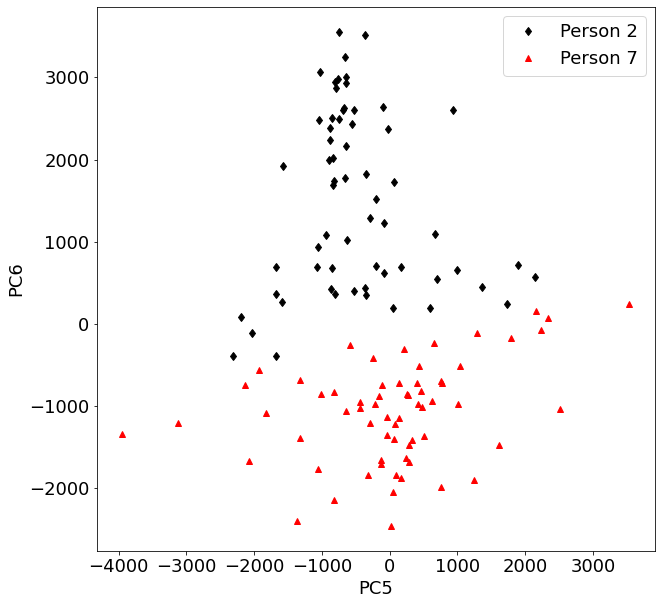

In [28]:
plt.plot(pca_coordsP1[0, :], pca_coordsP1[1, :], 'd', color='k', label='Person 2')
plt.plot(pca_coordsP2[0, :], pca_coordsP2[1, :], '^', color='r', label='Person 7')
plt.xlabel("PC5")
plt.ylabel("PC6")
plt.legend()
plt.show()

## 4. EigenFaces - Jacobi : implementacion del algoritmo en base a la descomposición Jacobi One Sided

El método de rotaciones Jacobi one sided, es un método numérico para calcular SVD. 
El método utiliza las rotaciones de Jacobi, una transformación de rotación, para construir a la matriz ortogonal V y llegar a W. 

En este apartado, hacemos uso de este método, que construimos en una práctica anterior, como una forma de llegar a la descomposición SVD e implementar el algoritmo Eigenfaces. 

In [36]:
# Importamos los paquetes de nuestro algoritmo
from svd_jacobi import sign
from svd_jacobi import ortogonalidad
from svd_jacobi import seno_coseno
from svd_jacobi import actualizar_AV
from svd_jacobi import jacobi_one_sided
from svd_jacobi import normalizacion_A

In [37]:
# Tomamos menos caritas para pruebas
training_faces = faces[:, :np.sum(nfaces[:5])]

In [38]:
training_faces.shape

(32256, 316)

In [39]:
# Calculamos el promedio del número de caras
avg_face = np.mean(training_faces, axis=1)

(-0.5, 167.5, 191.5, -0.5)

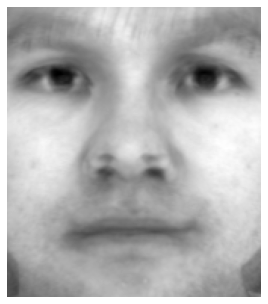

In [40]:
# Graficamos
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avg_face,(m,n)).T)
img_avg.set_cmap('gray')
plt.axis('off')

In [41]:
X = training_faces - np.tile(avg_face,(training_faces.shape[1], 1)).T

Obtenemos los valores singulares con nuestro algoritmo.

In [42]:
A,V = jacobi_one_sided(X,5)

1
2
3
4
5


Debido a que nuestro algoritmo sólo obtiene la matriz A y V, tenemos que normalizar A para obtener la matriz U.

In [43]:
U = normalizacion_A(A)

Y transponemos V para obtener la VT. 

In [44]:
VT = V.T

Así sale una eigenface con nuestro algoritmo.

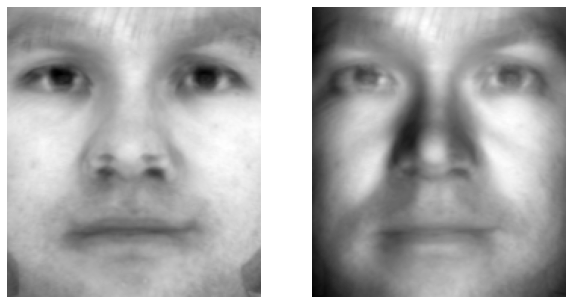

In [45]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avg_face,(m,n)).T)
img_avg.set_cmap('gray')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:,0],(m,n)).T)
img_u1.set_cmap('gray')
plt.axis('off')

plt.show()

Ahora intetamos reconstruir otra cara.

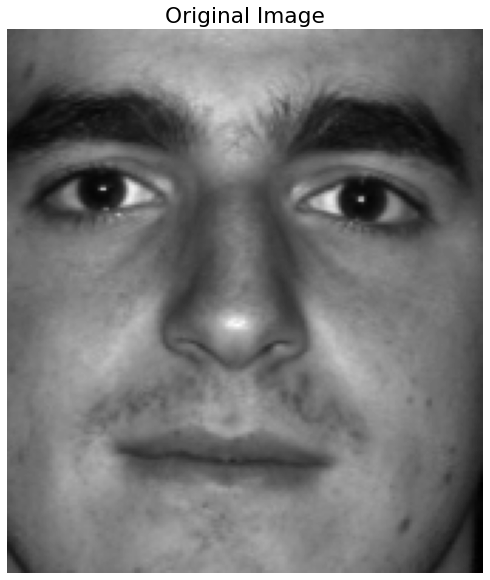

In [46]:
test_face = faces[:,np.sum(nfaces[:37])] # Primera foto de la persona 37
plt.imshow(np.reshape(test_face,(m,n)).T)
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

In [47]:
test_face_MS = test_face - avg_face #MS = Mean - Substracted
r_list = [25, 50]#, 100, 200, 400, 800, 1600]

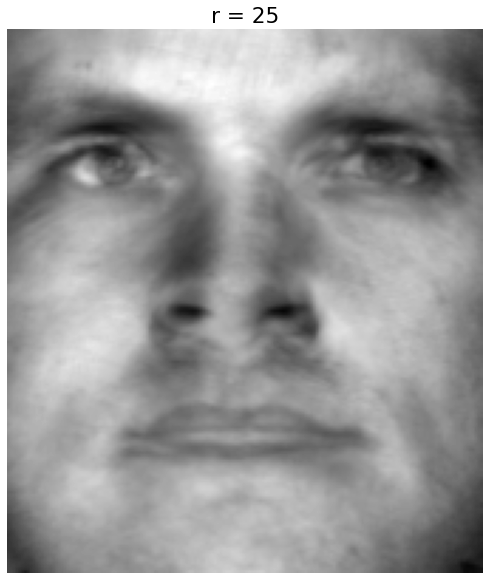

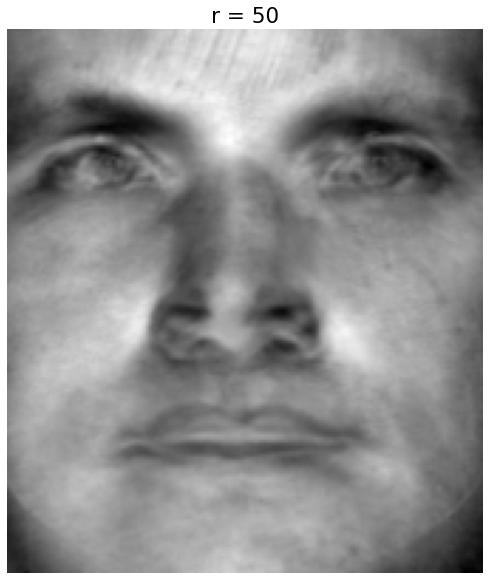

In [48]:
for r in r_list:
    recon_face = avg_face + U[:,:r]  @ U[:,:r].T @ test_face_MS
    img = plt.imshow(np.reshape(recon_face,(m,n)).T)
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')
    plt.show()

La comparación entre la aplicación clásica de SVD que realiza Python y nuestro algoritmo Jacobi One Sided en la implementación de Eigenfaces nos permite observar algunas conclusiones interesantes. Estas están relacionadas  con que el algortimo Jacobi One Sided, que fue programado por nosotros, no presenta el mismo nivel de optimización, por lo que tiene una exigencia computacional mucho mayor. 
Al darnos cuenta de este inconveniente, levantamos una instancia en AWS, pero incluso en ese caso, el algoritmo funcionaba de manera muy lenta. Por esa razón, tuvimos que entrenar Eigenfaces con menos rostros. Asimismo, tuvimos que poner una cantidad limitada de sweeps  a nuestro algoritmo, lo que implica que no se haya alcanzado ortogonalidad. Esto podría estar explicando por qué los rostros no se ven tan bien, en nuestra implementación, en comparación con la implementación original. 
Por este motivo, en una implementación siguiente sería necesario optimizar el algoritmo Jacobi One Sided, antes de poder utilizarlo para implementar Eigenfaces de manera óptima. 


## 5. Conclusiones: Aplicaciones del algoritmo de Eigenfaces, limitaciones y variantes alternativas

Algunas aplicaciones del reconocimiento de rostro están relacionadas a utilizarlo como una alternativa a la “contraseña”, que el usuario debe recordar para acceder a sus distinas aplicaciones. En tiempos de pandemia, donde las personas usan cubreboca de manera constante, puede resultar inconveniente, e incluso peligroso, que las personas tengan que quitarse el cubreboca cada vez que necesiten ser reconocidos por su teléfono inteligente, para destrabar una aplicación. 
Por eso, una de las implementaciones que nos gustaría desarrollar, en caso de poder extender este trabajo, sería la de probar cuán eficaz es el mismo al enfrentarse a fotos de personas que llevan puesto un cubreboca. Lamentablemente, por cuestiones de tiempo, no hemos podido desarrollar esta aplicación hasta el presente. Sin embargo, por las investigaciones que hemos podido realizar, sospechamos que es probable que el algoritmo de Eigenfaces no clasificaría de manera correcta estas imágenes. 


Uno de los principales desafíos en el reconocimiento de rostros viene dado por las variaciones dadas en posición (perspectiva), gestualidad e iluminación de las caras. El algoritmo de Eigenfaces parece no funcionar muy bien cuando algunos factores de ambiente son variados. 
Dadas estas limitaciones, nos gustaría mencionar, a modo de conclusión, dos enfoques alternativos que parecen capaces de sobreponerse a estas limitaciones. Estos son el algoritmo Fisherfaces y el enfoque de Tensor SVD. 


### FisherFaces

El problema de los cambios de ambiente es enfrentado por otro algoritmo denominado Fisherface. Fisherface parece funcionar bien bajo grandes variaciones de luz (sin importar de qué ángulo esta provenga) y de expresiones faciales. Fisherface utiliza FDA (Fisher Discriminant Analysis), además de PCA. Fisherface tiene un requerimiento computacional similar al de Eigenfaces, pero su tasa de error parece ser menor, para pruebas hechas en la Yale Face Database (Belhumeur, Hespanha, y Kriegman 1997). 

### Reconocimiento de rostros usando Tensor SVD


Para comprender este método, primero debemos preguntarnos qué son los tensores.
Los tensores son parte del algebra multilineal que pueden pensarse como una generalización de los vectores y matrices en 3 dimensiones o más. De hecho, puede pensarse a los vectores y las matrices como tensores de primer y segundo orden. De manera paralela a la descomposición SVD, en el orden de los tensores existe la truncated High order SVD (HOSVD).Cada direccion de un high order tensor se lo llama modo.   
Sabiendo estas cuestiones básicas, podemos explicar el método de tensorfaces. 
El método de TensorFaces procede almacenando diferentes modos, que como vimos, puede entenderse como una dirección de un tensor. Así, en un ejemplo simple, tal como es desarrollado en Elden (2017), un algoritmo tensorial podría guardar tres modos: un modo  de la imagen, un modo de la expresión, y un modo de la persona. Pero, esto se puede generalizar a una dimensión mayor sin problemas. La incorporación de estos modos, permite generar un algoritmo que consigue superar algunas de las fallas del algoritmo clásico de Eigenfaces. 
El método de Tensorfaces utiliza la High Order SVD descomposition (HOSVD) antes mencionada, de modo similar al caso de Eigenfaces desarrollado arriba. 


## 6. Referencias: 

 -  S.L. Bruton, J.N. Kutz, ["Data Driven Science & Engineering; Machine Learning, Dynamical Systems, and Control"](http://databookuw.com/databook.pdf) p. 24-33, 2017.
 -  W. Wichern, R. Johnson, “Applied Multivariate Statistical Analysis” Fifth Edition. p. 430-465, April 1982.
 -  [Advantages and Disadvantages of Principal Component Analysis in Machine Learning](http://theprofessionalspoint.blogspot.com/2019/03/advantages-and-disadvantages-of_4.html) (March 2019) The Professionals Point
 - Divyakant Meva, CK Kumbharana, “Study of different trends and techniques in face recognition”, International Journal of Computer Applications, Volume 96– No.8, June 2014, pp. 1-4

 - P. N. Belhumeur, J. P. Hespanha, and D. J. Kriegman, “Eigenfaces vs. Fisherfaces: Recognition using class-specific linear projection,” IEEE Trans. Pattern Anal. Machine Intell., vol. 19, pp. 711–720, July 1997

 - L. Elden, Matrix Methods in Data Mining and Pattern Recognition. SIAM, 2007.

 - Notas personales realizadas por Erick Palaciones sobre Tensores. (https://www.dropbox.com/s/udwrro2f11j2a0q/3.4.Tensores.pdf?dl=0)